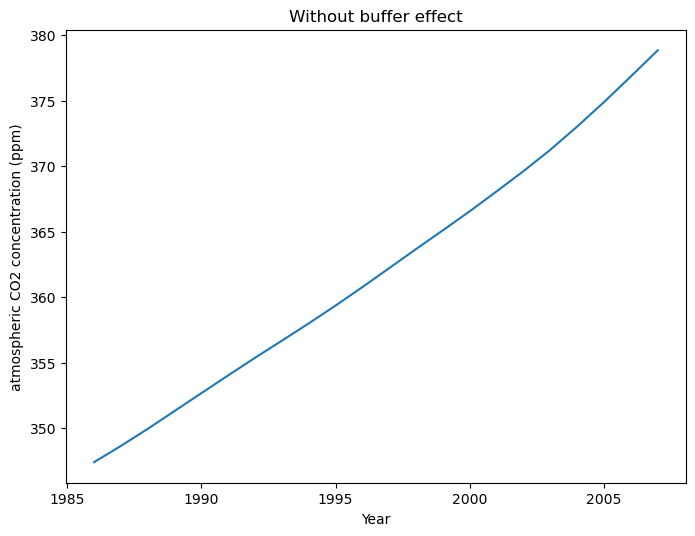

In [69]:
#Jiang Xiating explained to me what is asked in problem 1
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

data =pd.read_csv('global.1751_2014.csv',index_col= ['Year'])

# get a function
gamma = UnivariateSpline(data.index, data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'], k=3)
gamma.set_smoothing_factor(0.5)

def pend(y,t,k12,k21,gamma):
    yy = gamma(t)*1e-3
    N1, N2 = y
    return np.array([-k12*N1+k21*N2+yy, k12*N1-k21*N2])

t = np.arange(1986,2008)
k12 = 105/740
k21 = 102/900
# atmospheric concentration ppm N1
result = odeint(pend,(740,900),t,args=(k12, k21, gamma))[:,0]/2.13

# plot
fig =plt.figure(figsize=(8,6),dpi =100)
plt.plot(t,result)
plt.title('Without buffer effect')
plt.ylabel('atmospheric CO2 concentration (ppm)')
plt.xlabel('Year')
plt.show()

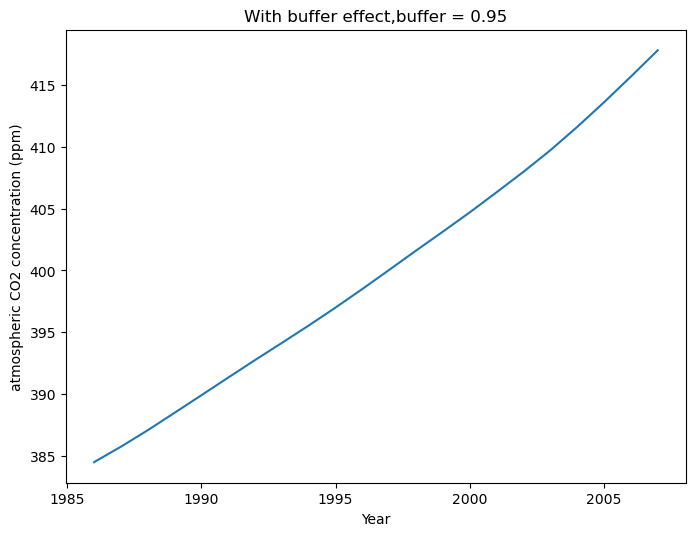

In [68]:
def pend1(y,t, k12, k21, gamma, theta, n02):
    N1, N2 = y
    yy = gamma(t)*1e-3
    return np.array([-k12*N1+k21*(n02+theta*(N2-n02))+yy, k12*N1-k21*(n02 +theta *(N2 - n02))])

k12 = 105/819
k21 = 102/821
buff = 0.95
# atmospheric concentration ppm N1
result1 = odeint(pend1,(819,821),t, args=(k12, k21, gamma,buff, 821))[:,0]/2.13

# plot
fig =plt.figure(figsize=(8,6),dpi =100)
plt.plot(t,result1)
plt.title('With buffer effect,buffer = 0.95')
plt.ylabel('atmospheric CO2 concentration (ppm)')
plt.xlabel('Year')
plt.show()

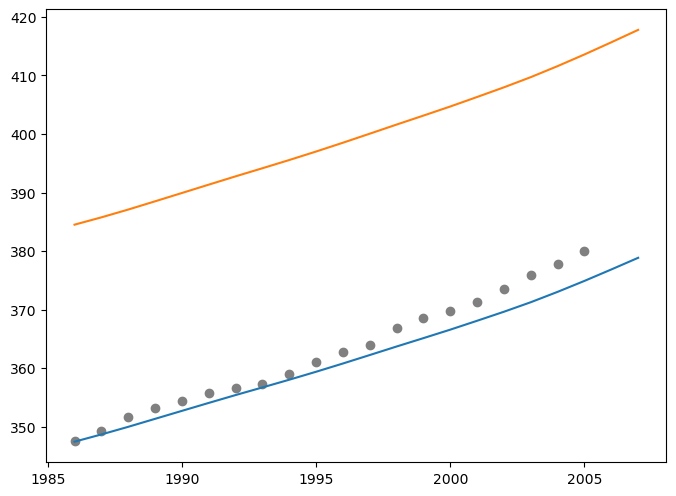

In [67]:
data =pd.read_csv('co2_annmean_mlo.csv', skiprows= range(1,28), nrows= 20)
fig =plt.figure(figsize=(8,6),dpi =100)
plt.scatter(data["year"], data["mean"], label ='observations',c="grey")
plt.plot(t,result)
plt.plot(t,result1)